# Prepocessing the data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
cols="""duration,
protocol_type,
service,
flag,
src_bytes,
dst_bytes,
land,
wrong_fragment,
urgent,
hot,
num_failed_logins,
logged_in,
num_compromised,
root_shell,
su_attempted,
num_root,
num_file_creations,
num_shells,
num_access_files,
num_outbound_cmds,
is_host_login,
is_guest_login,
count,
srv_count,
serror_rate,
srv_serror_rate,
rerror_rate,
srv_rerror_rate,
same_srv_rate,
diff_srv_rate,
srv_diff_host_rate,
dst_host_count,
dst_host_srv_count,
dst_host_same_srv_rate,
dst_host_diff_srv_rate,
dst_host_same_src_port_rate,
dst_host_srv_diff_host_rate,
dst_host_serror_rate,
dst_host_srv_serror_rate,
dst_host_rerror_rate,
dst_host_srv_rerror_rate"""

columns=[]
for c in cols.split(','):
    if(c.strip()):
       columns.append(c.strip())

columns.append('target')
#print(columns)
print(len(columns))

42


In [3]:
attacks_types = {
    'normal': 'normal',
'back': 'dos',
'buffer_overflow': 'u2r',
'ftp_write': 'r2l',
'guess_passwd': 'r2l',
'imap': 'r2l',
'ipsweep': 'probe',
'land': 'dos',
'loadmodule': 'u2r',
'multihop': 'r2l',
'neptune': 'dos',
'nmap': 'probe',
'perl': 'u2r',
'phf': 'r2l',
'pod': 'dos',
'portsweep': 'probe',
'rootkit': 'u2r',
'satan': 'probe',
'smurf': 'dos',
'spy': 'r2l',
'teardrop': 'dos',
'warezclient': 'r2l',
'warezmaster': 'r2l',
}

In [4]:
path = "data/kddcup.data_10_percent.gz"
df = pd.read_csv(path,names=columns)

#Adding Attack Type column
df['Attack Type'] = df.target.apply(lambda r:attacks_types[r[:-1]])

df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,target,Attack Type
0,0,tcp,http,SF,181,5450,0,0,0,0,...,1.0,0.0,0.11,0.0,0.0,0.0,0.0,0.0,normal.,normal
1,0,tcp,http,SF,239,486,0,0,0,0,...,1.0,0.0,0.05,0.0,0.0,0.0,0.0,0.0,normal.,normal
2,0,tcp,http,SF,235,1337,0,0,0,0,...,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal.,normal
3,0,tcp,http,SF,219,1337,0,0,0,0,...,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal.,normal
4,0,tcp,http,SF,217,2032,0,0,0,0,...,1.0,0.0,0.02,0.0,0.0,0.0,0.0,0.0,normal.,normal


In [35]:
print(f"Total rows: {len(df)}")


Total rows: 494021


In [5]:
df['Attack Type'].value_counts()

Attack Type
dos       391458
normal     97278
probe       4107
r2l         1126
u2r           52
Name: count, dtype: int64

# Visualizing the data

In [6]:
#Visualization
def bar_graph(feature):
    df[feature].value_counts().plot(kind="bar")

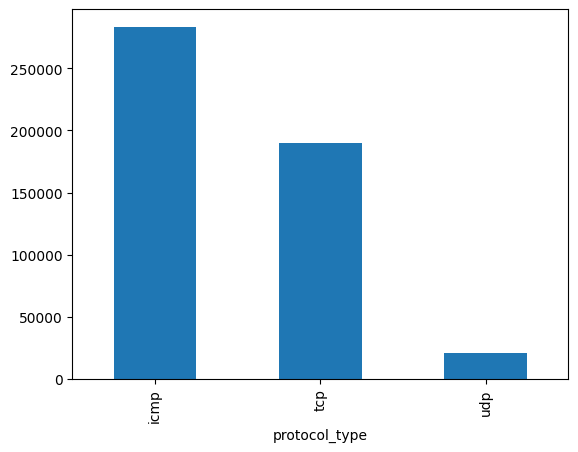

In [7]:
bar_graph('protocol_type')

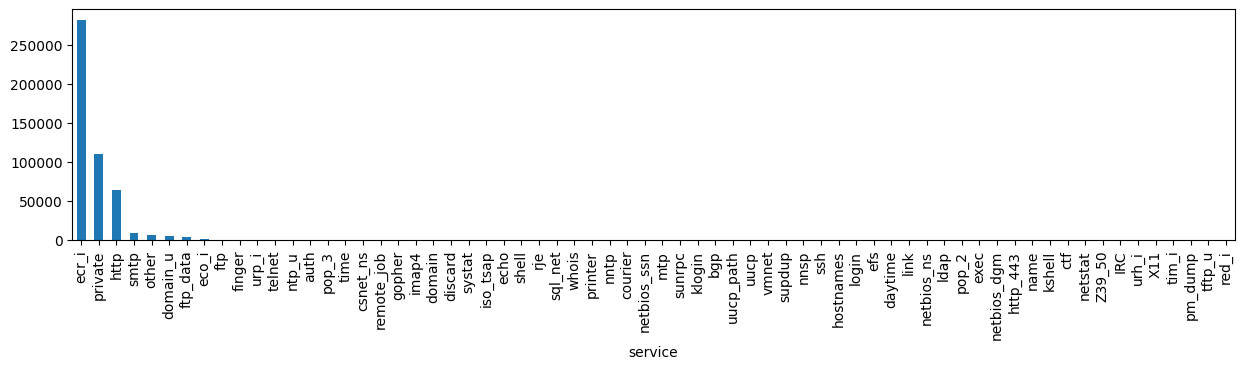

In [8]:
plt.figure(figsize=(15,3))
bar_graph('service')

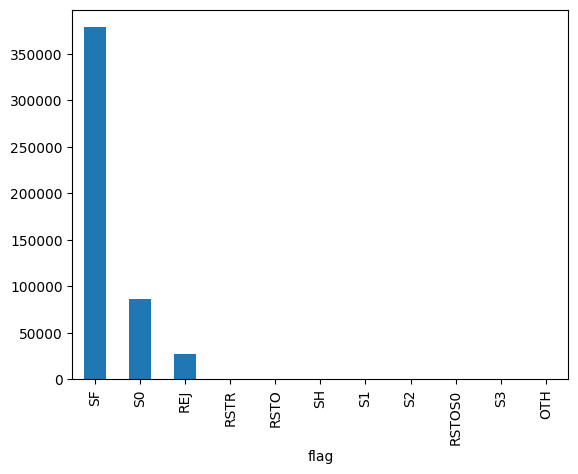

In [9]:
bar_graph('flag')

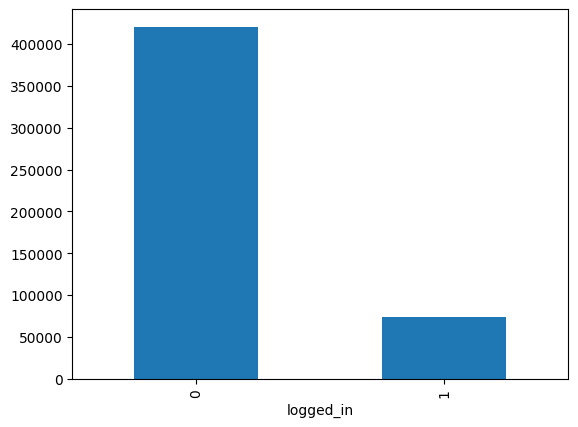

In [10]:
bar_graph('logged_in')

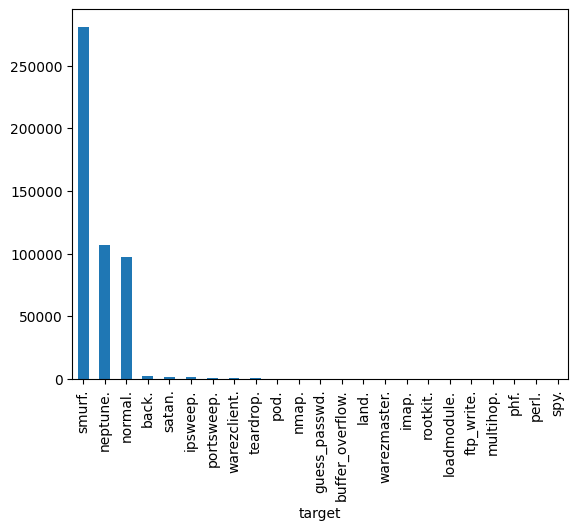

In [11]:
bar_graph('target')

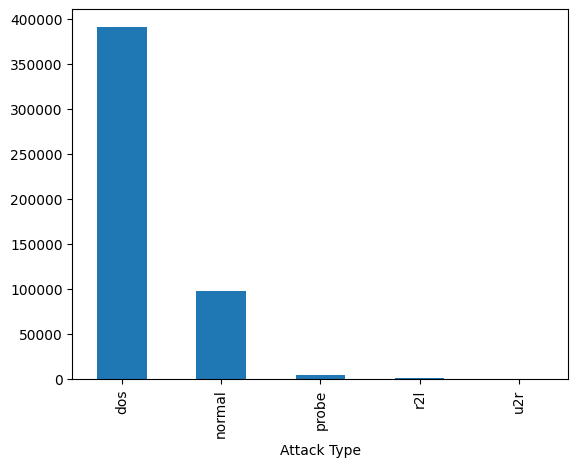

In [12]:
bar_graph('Attack Type')

In [13]:
df.columns

Index(['duration', 'protocol_type', 'service', 'flag', 'src_bytes',
       'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot',
       'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell',
       'su_attempted', 'num_root', 'num_file_creations', 'num_shells',
       'num_access_files', 'num_outbound_cmds', 'is_host_login',
       'is_guest_login', 'count', 'srv_count', 'serror_rate',
       'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate',
       'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count',
       'dst_host_srv_count', 'dst_host_same_srv_rate',
       'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
       'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
       'dst_host_srv_serror_rate', 'dst_host_rerror_rate',
       'dst_host_srv_rerror_rate', 'target', 'Attack Type'],
      dtype='object')

# Removing highly correlated columns

In [14]:
df.head(100)

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,target,Attack Type
0,0,tcp,http,SF,181,5450,0,0,0,0,...,1.0,0.0,0.11,0.00,0.0,0.0,0.0,0.0,normal.,normal
1,0,tcp,http,SF,239,486,0,0,0,0,...,1.0,0.0,0.05,0.00,0.0,0.0,0.0,0.0,normal.,normal
2,0,tcp,http,SF,235,1337,0,0,0,0,...,1.0,0.0,0.03,0.00,0.0,0.0,0.0,0.0,normal.,normal
3,0,tcp,http,SF,219,1337,0,0,0,0,...,1.0,0.0,0.03,0.00,0.0,0.0,0.0,0.0,normal.,normal
4,0,tcp,http,SF,217,2032,0,0,0,0,...,1.0,0.0,0.02,0.00,0.0,0.0,0.0,0.0,normal.,normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0,tcp,http,SF,337,330,0,0,0,0,...,1.0,0.0,0.08,0.01,0.0,0.0,0.0,0.0,normal.,normal
96,0,tcp,http,SF,293,38125,0,0,0,0,...,1.0,0.0,0.05,0.01,0.0,0.0,0.0,0.0,normal.,normal
97,0,tcp,http,SF,171,280,0,0,0,0,...,1.0,0.0,0.17,0.02,0.0,0.0,0.0,0.0,normal.,normal
98,0,tcp,http,SF,178,1973,0,0,0,0,...,1.0,0.0,0.06,0.02,0.0,0.0,0.0,0.0,normal.,normal


In [15]:
df = df.dropna(axis=1)# drop columns with NaN

df = df[[col for col in df if df[col].nunique() > 1]]# keep columns where there are more than 1 unique values



In [16]:
df.head(100)

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,target,Attack Type
0,0,tcp,http,SF,181,5450,0,0,0,0,...,1.0,0.0,0.11,0.00,0.0,0.0,0.0,0.0,normal.,normal
1,0,tcp,http,SF,239,486,0,0,0,0,...,1.0,0.0,0.05,0.00,0.0,0.0,0.0,0.0,normal.,normal
2,0,tcp,http,SF,235,1337,0,0,0,0,...,1.0,0.0,0.03,0.00,0.0,0.0,0.0,0.0,normal.,normal
3,0,tcp,http,SF,219,1337,0,0,0,0,...,1.0,0.0,0.03,0.00,0.0,0.0,0.0,0.0,normal.,normal
4,0,tcp,http,SF,217,2032,0,0,0,0,...,1.0,0.0,0.02,0.00,0.0,0.0,0.0,0.0,normal.,normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0,tcp,http,SF,337,330,0,0,0,0,...,1.0,0.0,0.08,0.01,0.0,0.0,0.0,0.0,normal.,normal
96,0,tcp,http,SF,293,38125,0,0,0,0,...,1.0,0.0,0.05,0.01,0.0,0.0,0.0,0.0,normal.,normal
97,0,tcp,http,SF,171,280,0,0,0,0,...,1.0,0.0,0.17,0.02,0.0,0.0,0.0,0.0,normal.,normal
98,0,tcp,http,SF,178,1973,0,0,0,0,...,1.0,0.0,0.06,0.02,0.0,0.0,0.0,0.0,normal.,normal


In [17]:
df.dtypes

duration                         int64
protocol_type                   object
service                         object
flag                            object
src_bytes                        int64
dst_bytes                        int64
land                             int64
wrong_fragment                   int64
urgent                           int64
hot                              int64
num_failed_logins                int64
logged_in                        int64
num_compromised                  int64
root_shell                       int64
su_attempted                     int64
num_root                         int64
num_file_creations               int64
num_shells                       int64
num_access_files                 int64
is_guest_login                   int64
count                            int64
srv_count                        int64
serror_rate                    float64
srv_serror_rate                float64
rerror_rate                    float64
srv_rerror_rate          

In [18]:
from sklearn.preprocessing import LabelEncoder

# Apply LabelEncoder to all object (string) columns
for col in df.select_dtypes(include=['object', 'category']).columns:
    df[col] = LabelEncoder().fit_transform(df[col])

In [19]:
df.head(100)

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,target,Attack Type
0,0,1,22,9,181,5450,0,0,0,0,...,1.0,0.0,0.11,0.00,0.0,0.0,0.0,0.0,11,1
1,0,1,22,9,239,486,0,0,0,0,...,1.0,0.0,0.05,0.00,0.0,0.0,0.0,0.0,11,1
2,0,1,22,9,235,1337,0,0,0,0,...,1.0,0.0,0.03,0.00,0.0,0.0,0.0,0.0,11,1
3,0,1,22,9,219,1337,0,0,0,0,...,1.0,0.0,0.03,0.00,0.0,0.0,0.0,0.0,11,1
4,0,1,22,9,217,2032,0,0,0,0,...,1.0,0.0,0.02,0.00,0.0,0.0,0.0,0.0,11,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0,1,22,9,337,330,0,0,0,0,...,1.0,0.0,0.08,0.01,0.0,0.0,0.0,0.0,11,1
96,0,1,22,9,293,38125,0,0,0,0,...,1.0,0.0,0.05,0.01,0.0,0.0,0.0,0.0,11,1
97,0,1,22,9,171,280,0,0,0,0,...,1.0,0.0,0.17,0.02,0.0,0.0,0.0,0.0,11,1
98,0,1,22,9,178,1973,0,0,0,0,...,1.0,0.0,0.06,0.02,0.0,0.0,0.0,0.0,11,1


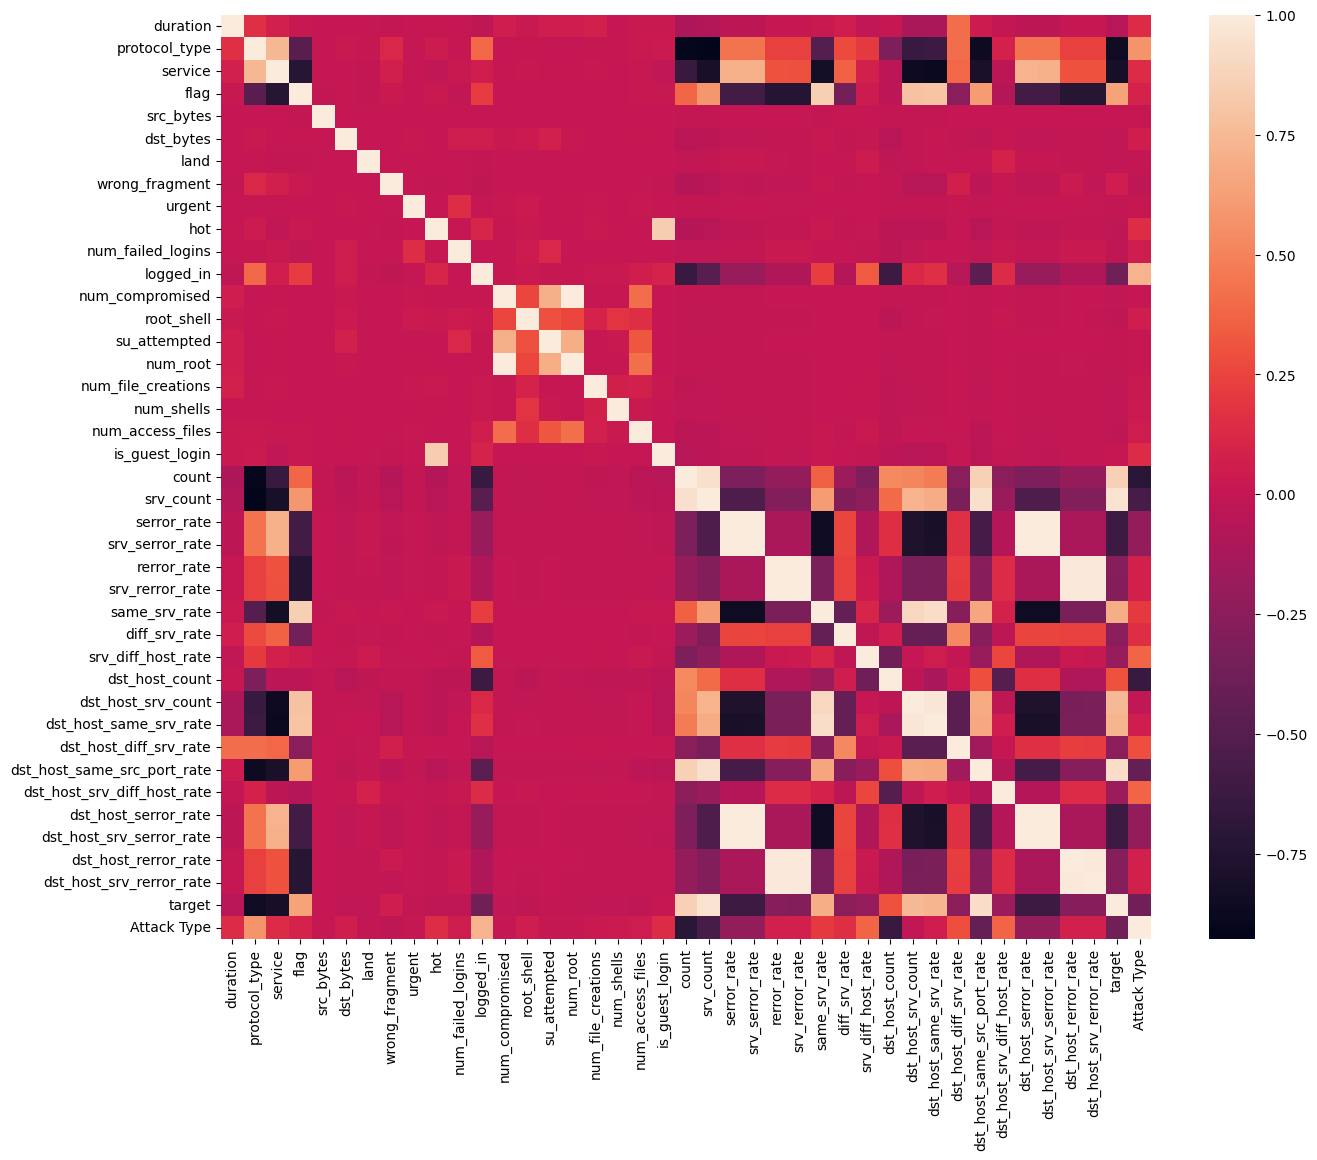

In [20]:


# Now compute the correlation

corr = df.corr()

plt.figure(figsize=(15,12))

sns.heatmap(corr)

plt.show()

In [21]:
#This variable is highly correlated with num_compromised and should be ignored for analysis.
#(Correlation = 0.9938277978738366)
df.drop('num_root',axis = 1,inplace = True)

#This variable is highly correlated with serror_rate and should be ignored for analysis.
#(Correlation = 0.9983615072725952)
df.drop('srv_serror_rate',axis = 1,inplace = True)

#This variable is highly correlated with rerror_rate and should be ignored for analysis.
#(Correlation = 0.9947309539817937)
df.drop('srv_rerror_rate',axis = 1, inplace=True)

#This variable is highly correlated with srv_serror_rate and should be ignored for analysis.
#(Correlation = 0.9993041091850098)
df.drop('dst_host_srv_serror_rate',axis = 1, inplace=True)

#This variable is highly correlated with rerror_rate and should be ignored for analysis.
#(Correlation = 0.9869947924956001)
df.drop('dst_host_serror_rate',axis = 1, inplace=True)

#This variable is highly correlated with srv_rerror_rate and should be ignored for analysis.
#(Correlation = 0.9821663427308375)
df.drop('dst_host_rerror_rate',axis = 1, inplace=True)

#This variable is highly correlated with rerror_rate and should be ignored for analysis.
#(Correlation = 0.9851995540751249)
df.drop('dst_host_srv_rerror_rate',axis = 1, inplace=True)

#This variable is highly correlated with dst_host_srv_count and should be ignored for analysis.
#(Correlation = 0.9736854572953938)
df.drop('dst_host_same_srv_rate',axis = 1, inplace=True)

In [22]:
df.head(100)

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,target,Attack Type
0,0,1,22,9,181,5450,0,0,0,0,...,1.0,0.0,0.00,9,9,0.0,0.11,0.00,11,1
1,0,1,22,9,239,486,0,0,0,0,...,1.0,0.0,0.00,19,19,0.0,0.05,0.00,11,1
2,0,1,22,9,235,1337,0,0,0,0,...,1.0,0.0,0.00,29,29,0.0,0.03,0.00,11,1
3,0,1,22,9,219,1337,0,0,0,0,...,1.0,0.0,0.00,39,39,0.0,0.03,0.00,11,1
4,0,1,22,9,217,2032,0,0,0,0,...,1.0,0.0,0.00,49,49,0.0,0.02,0.00,11,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0,1,22,9,337,330,0,0,0,0,...,1.0,0.0,0.00,12,255,0.0,0.08,0.01,11,1
96,0,1,22,9,293,38125,0,0,0,0,...,1.0,0.0,0.00,22,255,0.0,0.05,0.01,11,1
97,0,1,22,9,171,280,0,0,0,0,...,1.0,0.0,0.08,6,255,0.0,0.17,0.02,11,1
98,0,1,22,9,178,1973,0,0,0,0,...,1.0,0.0,0.00,16,255,0.0,0.06,0.02,11,1


# Label encoding the features

In [23]:
df.drop('service',axis = 1,inplace= True)

In [24]:
df.head(100)

,duration,protocol_type,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,...,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,target,Attack Type
0,0,1,9,181,5450,0,0,0,0,0,...,1.0,0.0,0.00,9,9,0.0,0.11,0.00,11,1
1,0,1,9,239,486,0,0,0,0,0,...,1.0,0.0,0.00,19,19,0.0,0.05,0.00,11,1
2,0,1,9,235,1337,0,0,0,0,0,...,1.0,0.0,0.00,29,29,0.0,0.03,0.00,11,1
3,0,1,9,219,1337,0,0,0,0,0,...,1.0,0.0,0.00,39,39,0.0,0.03,0.00,11,1
4,0,1,9,217,2032,0,0,0,0,0,...,1.0,0.0,0.00,49,49,0.0,0.02,0.00,11,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0,1,9,337,330,0,0,0,0,0,...,1.0,0.0,0.00,12,255,0.0,0.08,0.01,11,1
96,0,1,9,293,38125,0,0,0,0,0,...,1.0,0.0,0.00,22,255,0.0,0.05,0.01,11,1
97,0,1,9,171,280,0,0,0,0,0,...,1.0,0.0,0.08,6,255,0.0,0.17,0.02,11,1
98,0,1,9,178,1973,0,0,0,0,0,...,1.0,0.0,0.00,16,255,0.0,0.06,0.02,11,1


# Building and training a Neural Network

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score

In [39]:
import tensorflow as tf
from keras.models import Sequential, Model
from keras.layers import Dense, Conv1D, MaxPooling1D, Flatten, Dropout, Input, Concatenate, Add
import time #Time is imported here

In [27]:
df = df.drop(['target',], axis=1)
print(df.shape)

# Target variable and train set
Y = df[['Attack Type']]
X = df.drop(['Attack Type',], axis=1)

sc = MinMaxScaler()
X = sc.fit_transform(X)

# Split test and train data 
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33, random_state=42)
print(X_train.shape, X_test.shape)
print(Y_train.shape, Y_test.shape)

(494021, 31)
(330994, 30) (163027, 30)
(330994, 1) (163027, 1)


In [28]:
df.to_csv("ids.csv", index=False)

In [29]:
pd.read_csv("ids.csv")

,duration,protocol_type,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,...,rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,Attack Type
0,0,1,9,181,5450,0,0,0,0,0,...,0.0,1.0,0.0,0.00,9,9,0.0,0.11,0.00,1
1,0,1,9,239,486,0,0,0,0,0,...,0.0,1.0,0.0,0.00,19,19,0.0,0.05,0.00,1
2,0,1,9,235,1337,0,0,0,0,0,...,0.0,1.0,0.0,0.00,29,29,0.0,0.03,0.00,1
3,0,1,9,219,1337,0,0,0,0,0,...,0.0,1.0,0.0,0.00,39,39,0.0,0.03,0.00,1
4,0,1,9,217,2032,0,0,0,0,0,...,0.0,1.0,0.0,0.00,49,49,0.0,0.02,0.00,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
494016,0,1,9,310,1881,0,0,0,0,0,...,0.0,1.0,0.0,0.40,86,255,0.0,0.01,0.05,1
494017,0,1,9,282,2286,0,0,0,0,0,...,0.0,1.0,0.0,0.00,6,255,0.0,0.17,0.05,1
494018,0,1,9,203,1200,0,0,0,0,0,...,0.0,1.0,0.0,0.17,16,255,0.0,0.06,0.05,1
494019,0,1,9,291,1200,0,0,0,0,0,...,0.0,1.0,0.0,0.17,26,255,0.0,0.04,0.05,1


## Classical ML Model: Random Forest Classifier


In [55]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import time

# start the training 
start = time.time()

# training the model 
rf = RandomForestClassifier(n_estimators=300, random_state=42)
rf.fit(X_train, Y_train.values.ravel())

# End time of training 
end = time.time()
print(f" Training completed in {end - start:.2f} seconds.")

# Predict and print accuracy
y_pred_rf = rf.predict(X_test)
accuracy = accuracy_score(Y_test, y_pred_rf)
print(f" Random Forest Accuracy: {accuracy:.4f}")


 Training completed in 194.42 seconds.
 Random Forest Accuracy: 0.9998


## Shallow Neural Network

In [31]:
shallow_model = Sequential([
    Dense(1024, input_dim=30, activation='relu'),
    Dropout(0.01),
    Dense(5, activation='softmax')
])

C:\Users\Viraj\Videos\HDBW_NOTES\Ai-project\hdbw.ai-methods.capstone\.venv\Lib\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [32]:
shallow_model.compile(loss ='sparse_categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [33]:
tf.keras.utilsshallow_model.compile(loss ='sparse_categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy']).plot_model(shallow_model, to_file="shallow_model.png", show_shapes=True)

AttributeError: module 'keras._tf_keras.keras' has no attribute 'utilsshallow_model'

In [56]:

#timing start 
start_time = time.time();
shallow_model.fit(X_train, Y_train.values.ravel(), epochs=10, batch_size=32)
end_time = time.time();
print(f" Shallow Neural Network training time: {end_time - start_time:.2f} seconds")

Epoch 1/10
10344/10344 ━━━━━━━━━━━━━━━━━━━━ 72s 7ms/step - accuracy: 0.9993 - loss: 0.0028
Epoch 2/10
10344/10344 ━━━━━━━━━━━━━━━━━━━━ 80s 7ms/step - accuracy: 0.9993 - loss: 0.0027
Epoch 3/10
10344/10344 ━━━━━━━━━━━━━━━━━━━━ 72s 7ms/step - accuracy: 0.9993 - loss: 0.0027
Epoch 4/10
10344/10344 ━━━━━━━━━━━━━━━━━━━━ 82s 7ms/step - accuracy: 0.9993 - loss: 0.0026
Epoch 5/10
10344/10344 ━━━━━━━━━━━━━━━━━━━━ 71s 7ms/step - accuracy: 0.9993 - loss: 0.0027
Epoch 6/10
10344/10344 ━━━━━━━━━━━━━━━━━━━━ 83s 7ms/step - accuracy: 0.9994 - loss: 0.0024
Epoch 7/10
10344/10344 ━━━━━━━━━━━━━━━━━━━━ 83s 7ms/step - accuracy: 0.9993 - loss: 0.0027
Epoch 8/10
10344/10344 ━━━━━━━━━━━━━━━━━━━━ 73s 7ms/step - accuracy: 0.9993 - loss: 0.0029
Epoch 9/10
10344/10344 ━━━━━━━━━━━━━━━━━━━━ 83s 7ms/step - accuracy: 0.9993 - loss: 0.0026
Epoch 10/10
10344/10344 ━━━━━━━━━━━━━━━━━━━━ 80s 7ms/step - accuracy: 0.9994 - loss: 0.0022
 Shallow Neural Network training time: 788.95 seconds


## comparison between traditional random forest and shallow neural netowork algorithm 

In [41]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

from keras.models import Sequential
from keras.layers import Dense, Dropout

## Deep Neural Network

In [42]:
deep_model = Sequential([
    Dense(1024, input_dim=30, activation='relu'),
    Dropout(0.01),
    Dense(768, activation='relu'),
    Dropout(0.01),
    Dense(512, activation='relu'),
    Dropout(0.01),
    Dense(256, activation='relu'),
    Dropout(0.01),
    Dense(128, activation='relu'),
    Dropout(0.01),
    Dense(5, activation='softmax')
])

C:\Users\Viraj\Videos\HDBW_NOTES\Ai-project\hdbw.ai-methods.capstone\.venv\Lib\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [43]:
deep_model.compile(loss ='sparse_categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [44]:
tf.keras.utils.plot_model(deep_model, to_file="deep_model.png", show_shapes=True)

You must install graphviz (see instructions at https://graphviz.gitlab.io/download/) for `plot_model` to work.


In [49]:
start_stime = time.time();
deep_model.fit(X_train, Y_train.values.ravel(), epochs=10, batch_size=32)
end_time = time.time();
print(f" Deep Neural Network training time: {end_time - start_time:.2f} seconds")

Epoch 1/10
10344/10344 ━━━━━━━━━━━━━━━━━━━━ 379s 37ms/step - accuracy: 0.9985 - loss: 0.0065
Epoch 2/10
10344/10344 ━━━━━━━━━━━━━━━━━━━━ 389s 37ms/step - accuracy: 0.9987 - loss: 0.0063
Epoch 3/10
10344/10344 ━━━━━━━━━━━━━━━━━━━━ 381s 37ms/step - accuracy: 0.9987 - loss: 0.0059
Epoch 4/10
10344/10344 ━━━━━━━━━━━━━━━━━━━━ 401s 39ms/step - accuracy: 0.9986 - loss: 0.0064
Epoch 5/10
10344/10344 ━━━━━━━━━━━━━━━━━━━━ 453s 40ms/step - accuracy: 0.9991 - loss: 0.0054
Epoch 6/10
10344/10344 ━━━━━━━━━━━━━━━━━━━━ 429s 39ms/step - accuracy: 0.9989 - loss: 0.0053
Epoch 7/10
10344/10344 ━━━━━━━━━━━━━━━━━━━━ 471s 41ms/step - accuracy: 0.9989 - loss: 0.0053
Epoch 8/10
10344/10344 ━━━━━━━━━━━━━━━━━━━━ 448s 42ms/step - accuracy: 0.9990 - loss: 0.0067
Epoch 9/10
10344/10344 ━━━━━━━━━━━━━━━━━━━━ 484s 47ms/step - accuracy: 0.9989 - loss: 0.0056
Epoch 10/10
10344/10344 ━━━━━━━━━━━━━━━━━━━━ 468s 45ms/step - accuracy: 0.9989 - loss: 0.0063
 Deep Neural Network training time: 20741.72 seconds


## Convolutional Neural Network

In [50]:
# cnn_model = Sequential([
#     Conv1D(64, 3, padding="same", activation="relu", input_shape=(30,1)),
#     MaxPooling1D(pool_size=(2)),
#     Flatten(),
#     Dense(128, activation="relu"),
#     Dropout(0.5),
#     Dense(5, activation="softmax")
# ])

inputs = Input(shape=(30, 1))
y = Conv1D(62, 3, padding="same", activation="relu", input_shape=(30,1))(inputs)
y = MaxPooling1D(pool_size=(2))(y)
y1 = Flatten()(y)

y = Dropout(0.5)(y)
y = Conv1D(62, 3, padding="same", activation="relu", input_shape=(30,1))(inputs)
y = MaxPooling1D(pool_size=(2))(y)
y2 = Flatten()(y)

y = Dropout(0.5)(y)
y = Conv1D(124, 3, padding="same", activation="relu", input_shape=(30,1))(inputs)
y = MaxPooling1D(pool_size=(2))(y)
y = Flatten()(y)
y = Dropout(0.5)(y)
y = Dense(256, activation="relu")(y)
y = Dropout(0.5)(y)
y = Dense(5, activation='softmax')(y)

y = Concatenate()([y, y1, y2])

outputs = Dense(5, activation='softmax')(y)
cnn_model = Model(inputs=inputs, outputs=outputs)

C:\Users\Viraj\Videos\HDBW_NOTES\Ai-project\hdbw.ai-methods.capstone\.venv\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [51]:
cnn_model.compile(loss ='sparse_categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [52]:
tf.keras.utils.plot_model(cnn_model, to_file="cnn_model.png", show_shapes=True)

You must install graphviz (see instructions at https://graphviz.gitlab.io/download/) for `plot_model` to work.


In [54]:
start_stime = time.time();
cnn_model.fit(X_train.reshape((-1,30,1)), Y_train.values.ravel(), epochs=10, batch_size=32)
end_time = time.time();
print(f" Convolutional Neural Network training time: {end_time - start_time:.2f} seconds")



Epoch 1/10
10344/10344 ━━━━━━━━━━━━━━━━━━━━ 220s 21ms/step - accuracy: 0.9919 - loss: 0.0310
Epoch 2/10
10344/10344 ━━━━━━━━━━━━━━━━━━━━ 272s 22ms/step - accuracy: 0.9977 - loss: 0.0091
Epoch 3/10
10344/10344 ━━━━━━━━━━━━━━━━━━━━ 259s 22ms/step - accuracy: 0.9980 - loss: 0.0079
Epoch 4/10
10344/10344 ━━━━━━━━━━━━━━━━━━━━ 227s 22ms/step - accuracy: 0.9981 - loss: 0.0075
Epoch 5/10
10344/10344 ━━━━━━━━━━━━━━━━━━━━ 276s 23ms/step - accuracy: 0.9982 - loss: 0.0069
Epoch 6/10
10344/10344 ━━━━━━━━━━━━━━━━━━━━ 244s 24ms/step - accuracy: 0.9984 - loss: 0.0063
Epoch 7/10
10344/10344 ━━━━━━━━━━━━━━━━━━━━ 600s 56ms/step - accuracy: 0.9984 - loss: 0.0062
Epoch 8/10
10344/10344 ━━━━━━━━━━━━━━━━━━━━ 164s 16ms/step - accuracy: 0.9986 - loss: 0.0057
Epoch 9/10
10344/10344 ━━━━━━━━━━━━━━━━━━━━ 296s 25ms/step - accuracy: 0.9985 - loss: 0.0057
Epoch 10/10
10344/10344 ━━━━━━━━━━━━━━━━━━━━ 265s 26ms/step - accuracy: 0.9987 - loss: 0.0054
 Convolutional Neural Network training time: 24488.06 seconds


# Testing the neural network

In [ ]:
shallow_preds_train = shallow_model.predict(X_train)
shallow_test = shallow_model.predict(X_test)

In [ ]:
deep_preds_train = deep_model.predict(X_train)
deep_test = deep_model.predict(X_test)

In [ ]:
cnn_preds_train = cnn_model.predict(X_train.reshape((-1,30,1)))
cnn_test = cnn_model.predict(X_test.reshape((-1,30,1)))

In [ ]:
print("SHALLOW NEURAL NETWORK")
print("Training Accuracy:", accuracy_score(Y_train, np.argmax(shallow_preds_train, axis=1)))
print("Testing Accuracy:", accuracy_score(Y_test, np.argmax(shallow_test, axis=1)))

In [ ]:
print("DEEP NEURAL NETWORK")
print("Training Accuracy:", accuracy_score(Y_train, np.argmax(deep_preds_train, axis=1)))
print("Testing Accuracy:", accuracy_score(Y_test, np.argmax(deep_test, axis=1)))

In [ ]:
print("CONVOLUTIONAL NEURAL NETWORK")
print("Training Accuracy:", accuracy_score(Y_train, np.argmax(cnn_preds_train, axis=1)))
print("Testing Accuracy:", accuracy_score(Y_test, np.argmax(cnn_test, axis=1)))

# More info

In [ ]:
df.columns

![image.png](https://i.ibb.co/QH93r9g/Screenshot-from-2022-11-03-02-32-15.png)

![image.png](https://i.ibb.co/B3J7kSV/Screenshot-from-2022-11-03-02-24-30.png)


Table 4: Summarizes attack types and 4 different categories: (1)DoS (Denial of Service attacks), (2) R2L (Root to Local attacks), (3) U2R (User to Root attack), (4) Probe (Probing attacks).